In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from advection_solver.advection_1d import vanleer_tendency
from advection_solver.advection_2d import tendency_2d_vanleer

# 1D

In [2]:
nx = 100
Lx = 1
dx = Lx/nx
dt = 0.01
u = np.ones(nx) * 0.5
c0 = np.zeros(nx)
c0[int(nx*0.2):int(nx*0.4)] = 1.0

Text(0.5,1,'Second-order scheme without limiter')

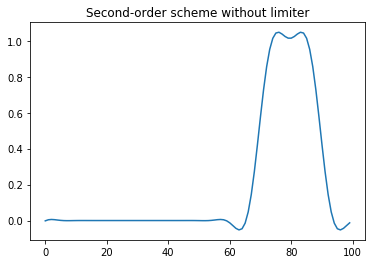

In [3]:
nt = 500

c = c0.copy()
for _ in range(nt):
    c += vanleer_tendency(c, u, dx, dt, limiter=False)
    
plt.plot(c)
plt.title('Second-order scheme without limiter')

# 2D

In [4]:
nx = 100
ny = 100
Lx = 1
Ly = 1
dx = Lx/nx
dy = Ly/ny
dt = 0.01
nt = 100

u = np.ones([nx, ny]) * 0.5 
v = np.ones([nx, ny]) * 0.3

c0 = np.zeros([nx, ny])
c0[int(ny*0.2):int(ny*0.4), int(nx*0.1):int(nx*0.3)] = 1.0  # 2D square

In [5]:
%%time
# second time will be much faster (due to jit)
c = c0.copy()
for _ in range(nt):
    c += tendency_2d_vanleer(c, u, v, dx, dy, dt, limiter=False)

CPU times: user 4.38 s, sys: 54.2 ms, total: 4.44 s
Wall time: 4.53 s


Text(0.5,1,'Second-order (Van-Leer)')

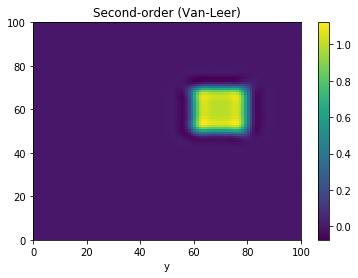

In [6]:
plt.pcolormesh(c)
plt.xlabel('x')
plt.xlabel('y')
plt.colorbar()
plt.title('Second-order (Van-Leer)')